# Hospice Utilization by Minorites
## Investigator: J. Patrick Bernard
## MSDS692 DataSciencePracticum 2

### Purpose:  
The purpose of my project is to investigate utilization of Hospice care by minority racial groups. There is a history of racial groups having lower levels of access to medical care. Is also true for hospice care? My goal is not to explain why or how this is occurring, that is the job of social and healthcare professionals. My goal is to collect and evaluate the data so that these professionals can direct their effort in the best way possible.  the region of concern will be Louisiana and Mississippi.  

### Data Source:  
2018 Medicare hospice claims.  

### Data Understanding & Hospice Utilization Determination

In this notebook I develop some simlple data understanding plot to get a feel for the data. Then I claculate the hospic utilization by racial category.  this is perform for each stae.  In the CreateStatePickleFiles notbook I divided the entire data set by state saving that data in a seperate file.  


In [1]:
# packages
import pandas as pd
import numpy as np
import re
import csv
import os
import pickle
from io import StringIO
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#format the work space
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
# These are the dictionary descriptions for the categorical data
states = {1:'Alabama',2:'Alaska',3:'Arizona',4:'Arkansas',5:'California',6:'Colorado',7:'Connecticut',8:'Delaware',
          9:'DistOCol',10:'Florida',11:'Georgia',12:'Hawaii',13:'Idaho',14:'Illinois',15:'Indiana',16:'Iowa',17:'Kansas',
          18:'Kentucky',19:'Louisiana',20:'Maine',21:'Maryland',22:'Massachusetts',23:'Michigan',24:'Minnisota',
          25:'Mississippi',26:'Missouri',27:'Montana',28:'Nebraska',29:'Nevada',30:'NewHampshire',31:'NewJersey',
          32:'NewMexico',33:'NewYork',34:'NorthCarolina',35:'NorthDakota',36:'Ohio',37:'Oklahoma',38:'Oregon',39:'Pennsylvainia',
          40:'PuertoRico',41:'RhodeIsland',42:'SouthCarolina',43:'SouthDakota',44:'Tennessee',45:'Texas',46:'Utah',47:'Vermont',
          48:'VirginIsland',49:'Virginia',50:'Washington',51:'WestVirgina',52:'Wisconson',53:'Wyoming',54:'Africa',55:'Canada_Islands',
          56:'CentAmerWstInd',57:'Europe',58:'Mexico',59:'Oceania',60:'Philippines',61:'SouthAmerica',62:'UsPosessions',
          63:'AmericanSamoa',64:'Guam',65:'SaipanNorthMarianas',97:'NorthernMarianas',98:'Guam',99:'Unknown'}
Race = {0:'Unknown', 1:'White',2:'Black',3:'Other',4:'Asian',5:'Hispanic',6:'North_American_Native'}
Race_WBAllOther  = {1:'White',2:'Black',3:'All Other'}
AgeGroups = {0:'Unknown',1:'<64',2:'64-69',3:'70-74',4:'75-79',5:'80-84',6:'>84'}
PTDCSTUS = {0:'Missing',1:'Still Patient',2:'DC Alive',3:'DC Deceased'}

In [4]:
# D_SSA is a look up table for the county id
SSA = pd.read_csv('e:/PatrickBernard/d_ssa.csv',names = ['county_id', 'county'])
#D_SSA.set_index('county_id',inplace = True)  
SSA.sample(3)

,county_id,county
2137,37050,Blaine OK
1977,34860,Swain NC
1830,33010,Allegany NY


In [5]:
subject_states = [19]#,25]

for s in subject_states:
    with open(f'e:/PatrickBernard/{states[s]}MBSF2018.pkl', 'rb') as f:
        regional_data = pickle.load(f)


In [6]:
regional_data.sample(10)

,Bene_ID,D_State,D_SSA,D_SSA2,D_Bene,D_DIED,D_DOD_Date,D_Sex,D_Race,D_Race_WBAllOther,...,D_HHA_PTDCSTUS,D_HHA_DIED,D_HHA_CCS,D_HHA_pdx,D_HHA_Episodes,D_HHA_Visits,D_HHA_Days,D_HHA_PMT_AMT,Total_Pay,N_Providers
316340,470723215,19,19040,1,1,0,NaT,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
202928,445103638,19,19000,1,1,0,NaT,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
280425,108599889,19,19510,1,1,0,NaT,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
18601,459840610,19,19280,1,1,0,NaT,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
176168,482253045,19,19250,1,1,0,NaT,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6983,470373848,19,19490,1,1,0,NaT,2,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
155953,469080771,19,19510,1,1,0,NaT,2,0,3,...,2.0,0.0,233,11,1,14.0,36.0,2763.09,NaN,2
321224,130960093,19,19510,1,1,0,NaT,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
418469,477861810,19,19350,1,1,0,NaT,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
329901,445691541,19,19160,1,1,0,NaT,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
atributes = list(regional_data.columns.values)

In [8]:
atributes

['Bene_ID',
 'D_State',
 'D_SSA',
 'D_SSA2',
 'D_Bene',
 'D_DIED',
 'D_DOD_Date',
 'D_Sex',
 'D_Race',
 'D_Race_WBAllOther',
 'D_Age',
 'D_AgeGroups',
 'D_TM',
 'D_TM_Died',
 'D_MA_Plan',
 'D_MA_Plan_Died',
 'D_MS_CD',
 'D_OREC',
 'D_CREC',
 'D_ESRD',
 'D_State_BuyIn_Dual',
 'D_HOS_PT',
 'D_HOS_PROVIDER_ID',
 'D_HOS_ProviderNameID',
 'D_HOS_PTDCSTUS',
 'D_HOS_Died',
 'D_HOS_CCS',
 'D_HOS_pdx',
 'D_HOS_UTIL_DAY',
 'D_HOS_PMT_AMT',
 'D_INPT_PT',
 'D_INPT_PROVIDER_ID',
 'D_INPT_ProviderNameID',
 'D_INPT_DC_Status',
 'D_INPT_Died',
 'D_INPT_CCS',
 'D_INPT_pdx',
 'D_INPT_UTIL_DAY',
 'D_INPT_PMT_AMT',
 'D_SNF_PT',
 'D_SNF_PROVIDER_ID',
 'D_SNF_ProviderNameID',
 'D_SNF_DC_Status',
 'D_SNF_Died',
 'D_SNF_CCS',
 'D_SNF_pdx',
 'D_SNF_UTIL_DAY',
 'D_SNF_PMT_AMT',
 'D_HHA_PT',
 'D_HHA_PROVIDER_ID',
 'D_HHA_ProviderNameID',
 'D_HHA_PTDCSTUS',
 'D_HHA_DIED',
 'D_HHA_CCS',
 'D_HHA_pdx',
 'D_HHA_Episodes',
 'D_HHA_Visits',
 'D_HHA_Days',
 'D_HHA_PMT_AMT',
 'Total_Pay',
 'N_Providers']

In [9]:
regional_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893266 entries, 1 to 344680
Data columns (total 61 columns):
Bene_ID                  893266 non-null int64
D_State                  893266 non-null int64
D_SSA                    893266 non-null int64
D_SSA2                   893266 non-null int64
D_Bene                   893266 non-null int64
D_DIED                   893266 non-null int64
D_DOD_Date               35312 non-null datetime64[ns]
D_Sex                    893266 non-null int64
D_Race                   893266 non-null int64
D_Race_WBAllOther        893266 non-null int64
D_Age                    893266 non-null int64
D_AgeGroups              893266 non-null int64
D_TM                     893266 non-null int64
D_TM_Died                893266 non-null int64
D_MA_Plan                893266 non-null int64
D_MA_Plan_Died           893266 non-null int64
D_MS_CD                  893266 non-null int64
D_OREC                   893266 non-null int64
D_CREC                   893266 non

In [10]:
# This is an experiment so that latter on the state name can be populated into the figure names. It does not yet work
print(f'state {states[s]} subject {s}')

state Louisiana subject 19


In [11]:
#Variables and empty data frames
figPath = 'e:/PatrickBernard/figures/'

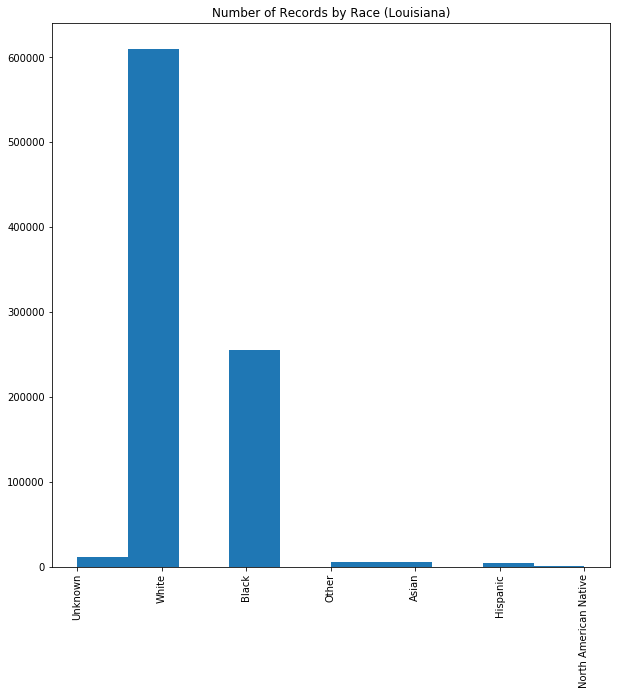

In [12]:
plt.hist(regional_data.D_Race)
plt.title(f'Number of Records by Race ({states[s]})')
# Add labels for x axis
plt.xticks([0,1,2,3,4,5,6],labels= ['Unknown','White','Black','Other','Asian','Hispanic','North American Native'], rotation=90) 
plt.savefig(f'{figPath}{states[s]}_RecordsByRace.png', facecolor = None)
plt.show()


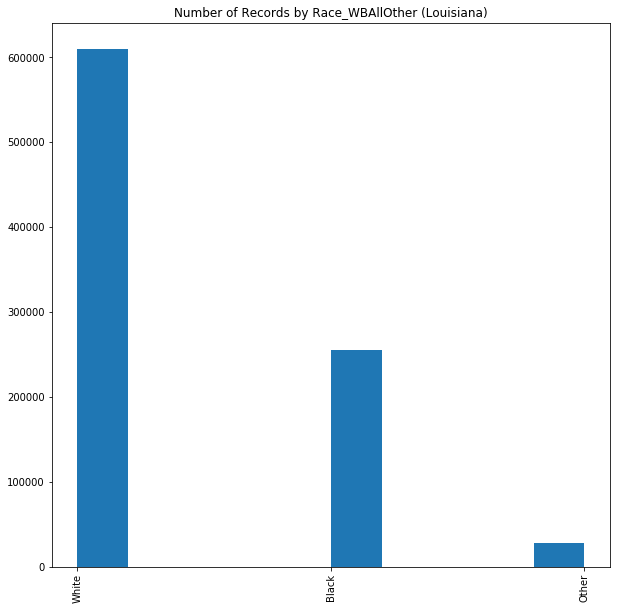

In [13]:
plt.hist(regional_data.D_Race_WBAllOther)
plt.title(f'Number of Records by Race_WBAllOther ({states[s]})')
plt.xticks([1,2,3],labels= ['White','Black','Other'], rotation=90) 
plt.savefig(f'{figPath}{states[s]}_RecordsByRaceWBAllOther.png')
plt.show()


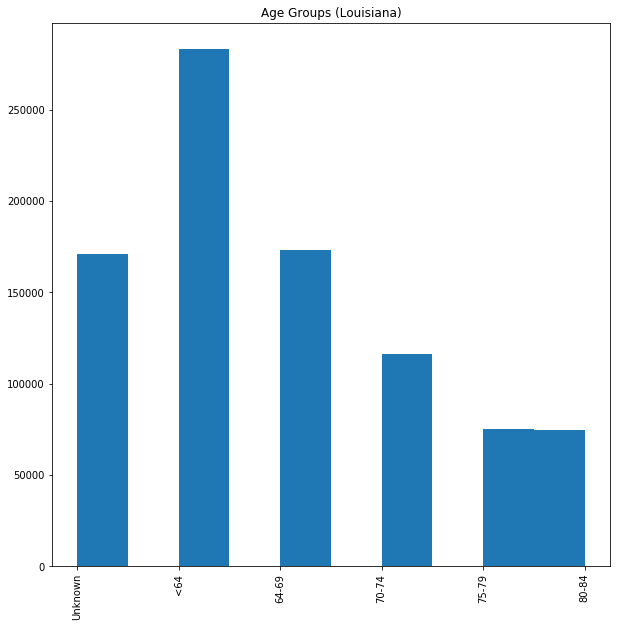

In [14]:
plt.hist(regional_data.D_AgeGroups)
plt.title(f'Age Groups ({states[s]})')
plt.xticks([1,2,3,4,5,6],labels= ['Unknown','<64','64-69','70-74','75-79','80-84','>84'], rotation=90) 
plt.savefig(f'{figPath}{states[s]}_AgeGroups.png')
plt.show()


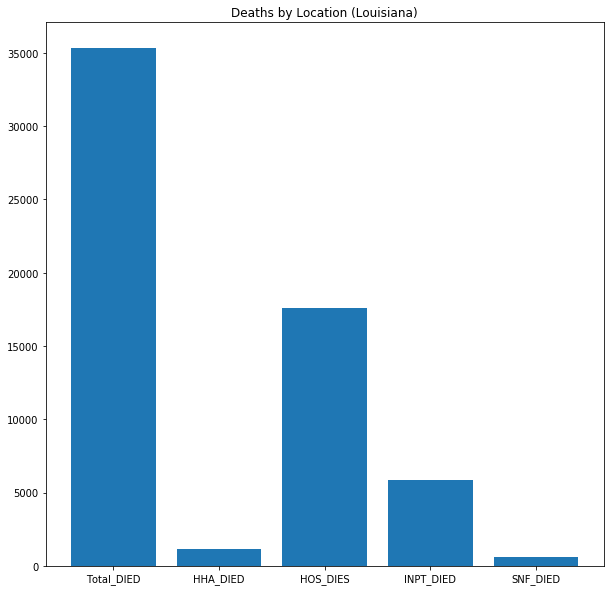

In [15]:
data = {'Total_DIED':regional_data.D_DIED.sum(),'HHA_DIED':regional_data.D_HHA_DIED.sum(),'HOS_DIES':regional_data.D_HOS_Died.sum(),
         'INPT_DIED':regional_data.D_INPT_Died.sum(),'SNF_DIED':regional_data.D_SNF_Died.sum()}
plt.bar(list(data.keys()),list(data.values()))
plt.title(f'Deaths by Location ({states[s]})')
plt.show()

In [16]:
regional_data.groupby(['Bene_ID']).agg('count')

,D_State,D_SSA,D_SSA2,D_Bene,D_DIED,D_DOD_Date,D_Sex,D_Race,D_Race_WBAllOther,D_Age,...,D_HHA_PTDCSTUS,D_HHA_DIED,D_HHA_CCS,D_HHA_pdx,D_HHA_Episodes,D_HHA_Visits,D_HHA_Days,D_HHA_PMT_AMT,Total_Pay,N_Providers
Bene_ID,,,,,,,,,,,,,,,,,,,,,
100000001,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
100000890,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
100001071,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
100001299,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
100001304,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499999391,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
499999731,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
499999741,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


**Note**  
group the records by Bene_ID, there are no duplicate records in the data set.

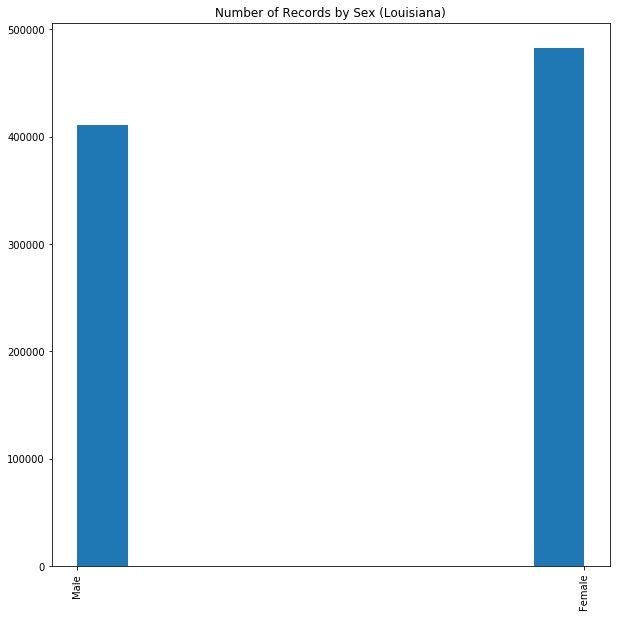

In [17]:
plt.hist(regional_data.D_Sex)
plt.title(f'Number of Records by Sex ({states[s]})')
# Add labels for x axis
plt.xticks([1,2],labels= ['Male','Female'], rotation=90) 
plt.savefig(f'{figPath}{states[s]}_RecordsBySex.png', facecolor = None)
plt.show()

### Build a summary table  
from the data that has be loaded generate a summery file for future procession

In [18]:
figPath = 'e:/PatrickBernard/figures/'

for file in os.listdir(f'e:/PatrickBernard/'):
    if file.endswith('.pkl')== False:
        continue
    else:
        with open(f'e:/PatrickBernard/{file}', 'rb') as f:
            regional_data = pickle.load(f)


    # Plot data understanding chart for each state
    s = regional_data.iloc[0,1]
    plt.hist(regional_data.D_Race)
    plt.title(f'Number of Records by Race ({states[s]})')
    # Add labels for x axis
    plt.xticks([0,1,2,3,4,5,6],labels= ['Unknown','White','Black','Other','Asian','Hispanic','North American Native'], rotation=90) 
    plt.savefig(f'{figPath}{states[s]}_RecordsByRace.png', facecolor = None,bbox_inches = 'tight')
    plt.close()
    
    plt.hist(regional_data.D_Race_WBAllOther)
    plt.title(f'Number of Records by Race_WBAllOther ({states[s]})')
    plt.xticks([1,2,3],labels= ['White','Black','Other'], rotation=90) 
    plt.savefig(f'{figPath}{states[s]}_RecordsByRaceWBAllOther.png',bbox_inches = 'tight')
    plt.close()
    
    plt.hist(regional_data.D_AgeGroups)
    plt.title(f'Age Groups ({states[s]})')
    plt.xticks([1,2,3,4,5,6],labels= ['Unknown','<64','64-69','70-74','75-79','80-84','>84'], rotation=90) 
    plt.savefig(f'{figPath}{states[s]}_AgeGroups.png',bbox_inches = 'tight')
    plt.close()
    
    data = {'Total_DIED':regional_data.D_DIED.sum(),'HHA_DIED':regional_data.D_HHA_DIED.sum(),'HOS_DIES':regional_data.D_HOS_Died.sum(),
         'INPT_DIED':regional_data.D_INPT_Died.sum(),'SNF_DIED':regional_data.D_SNF_Died.sum()}
    plt.bar(list(data.keys()),list(data.values()))
    plt.title(f'Deaths by Location ({states[s]})')
    plt.savefig(f'{figPath}{states[s]}_DeathByLocation.png',bbox_inches = 'tight')
    plt.close()
    
    plt.hist(regional_data.D_Sex)
    plt.title(f'Number of Records by Sex ({states[s]})')
    # Add labels for x axis
    plt.xticks([1,2],labels= ['Male','Female'], rotation=90) 
    plt.savefig(f'{figPath}{states[s]}_RecordsBySex.png', facecolor = None,bbox_inches = 'tight')
    plt.close()
    
    # Create a Utilization summary file with summary data for all the states
    
    s_data = {'state':states[s], 'Tot_record':len(regional_data)}

    race_count = regional_data.groupby('D_Race')['D_Race'].count()

    sum_Race = {'Race_unk_tot' : race_count[0], 'Race_white_tot': race_count[1],'Race_black_tot':race_count[2],'race_other_tot':race_count[3],
                'Race_asian_tot': race_count[4], 'Race_Hispanic_tot': race_count[5], 'Race_NA_Native_tot': race_count[6]}

    s_data.update(sum_Race)

    for i in range (0, 7):
        z_data = {f'{Race[i]}_alive': len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_DIED == 0)].index),
        f'{Race[i]}_deceased' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_DIED == 1)].index),
        f'{Race[i]}_HOS_alive' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_HOS_Died == 0)].index),
        f'{Race[i]}_HOS_deceased' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_HOS_Died == 1)].index)}
        
        util = {f'{Race[i]}_HOS_Utilization' : z_data[f'{Race[i]}_HOS_deceased']/z_data[f'{Race[i]}_deceased']}
        z_data.update(util)
        s_data.update(z_data)
        

    cols = ['state', 'Tot_record','Race_unk_tot','Unknown_alive','Unknown_deceased','Unknown_HOS_alive', 'Unknown_HOS_deceased', \
            'Unknown_HOS_Utilization',  \
            'Race_white_tot','White_alive','White_deceased', 'White_HOS_alive', 'White_HOS_deceased','White_HOS_Utilization', \
            'Race_black_tot','Black_alive','Black_deceased', 'Black_HOS_alive','Black_HOS_deceased', 'Black_HOS_Utilization', \
            'race_other_tot','Other_alive','Other_deceased', 'Other_HOS_alive', 'Other_HOS_deceased', 'Other_HOS_Utilization', \
            'Race_asian_tot','Asian_alive','Asian_deceased', 'Asian_HOS_alive', 'Asian_HOS_deceased', 'Asian_HOS_Utilization', \
            'Race_Hispanic_tot','Hispanic_alive','Hispanic_deceased', 'Hispanic_HOS_alive','Hispanic_HOS_deceased', \
            'Hispanic_HOS_Utilization', \
            'Race_NA_Native_tot','North_American_Native_alive','North_American Native_deceased', 'North_American_Native_HOS_alive', \
            'North_American_Native_HOS_deceased','North_American_Native_HOS_Utilization']


    # Open the pickle file and append the summary dictionary to the file
    #TODO once all of the column are identified in the summary data order the data for clarity in the dataframe

    try:
        with open(f'e:/PatrickBernard/figures/summary_data.pkl', 'rb') as f:
                    summary_data = pickle.load(f)
    except (OSError, IOError) as e:
        summary_data = pd.DataFrame(columns = cols)

    summary_data = summary_data.append(s_data, ignore_index=True)
    with open(f'e:/PatrickBernard/figures/summary_data.pkl', 'wb') as f:
            pickle.dump(summary_data, f)


In [5]:
with open(f'e:/PatrickBernard/figures/summary_data.pkl', 'rb') as f:
                summary_data = pickle.load(f)

In [6]:
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 45 columns):
state                                    61 non-null object
Tot_record                               61 non-null object
Race_unk_tot                             61 non-null object
Unknown_alive                            61 non-null object
Unknown_deceased                         61 non-null object
Unknown_HOS_alive                        61 non-null object
Unknown_HOS_deceased                     61 non-null object
Unknown_HOS_Utilization                  61 non-null float64
Race_white_tot                           61 non-null object
White_alive                              61 non-null object
White_deceased                           61 non-null object
White_HOS_alive                          61 non-null object
White_HOS_deceased                       61 non-null object
White_HOS_Utilization                    61 non-null float64
Race_black_tot                           61 non-null ob

In [7]:
summary_data.columns

Index(['state', 'Tot_record', 'Race_unk_tot', 'Unknown_alive',
       'Unknown_deceased', 'Unknown_HOS_alive', 'Unknown_HOS_deceased',
       'Unknown_HOS_Utilization', 'Race_white_tot', 'White_alive',
       'White_deceased', 'White_HOS_alive', 'White_HOS_deceased',
       'White_HOS_Utilization', 'Race_black_tot', 'Black_alive',
       'Black_deceased', 'Black_HOS_alive', 'Black_HOS_deceased',
       'Black_HOS_Utilization', 'race_other_tot', 'Other_alive',
       'Other_deceased', 'Other_HOS_alive', 'Other_HOS_deceased',
       'Other_HOS_Utilization', 'Race_asian_tot', 'Asian_alive',
       'Asian_deceased', 'Asian_HOS_alive', 'Asian_HOS_deceased',
       'Asian_HOS_Utilization', 'Race_Hispanic_tot', 'Hispanic_alive',
       'Hispanic_deceased', 'Hispanic_HOS_alive', 'Hispanic_HOS_deceased',
       'Hispanic_HOS_Utilization', 'Race_NA_Native_tot',
       'North_American_Native_alive', 'North_American Native_deceased',
       'North_American_Native_HOS_alive', 'North_American_Native

In [8]:
 col1 = ['Tot_record', 'Race_unk_tot', 'Unknown_alive','Unknown_deceased', 'Unknown_HOS_alive', 'Unknown_HOS_deceased','Race_white_tot', 'White_alive',
    'White_deceased', 'White_HOS_alive', 'White_HOS_deceased','Race_black_tot', 'Black_alive','Black_deceased', 'Black_HOS_alive',
    'Black_HOS_deceased', 'race_other_tot', 'Other_alive','Other_deceased', 'Other_HOS_alive', 'Other_HOS_deceased', 'Race_asian_tot', 'Asian_alive',
    'Asian_deceased', 'Asian_HOS_alive', 'Asian_HOS_deceased', 'Race_Hispanic_tot', 'Hispanic_alive','Hispanic_deceased', 'Hispanic_HOS_alive',
    'Hispanic_HOS_deceased','North_American_Native_HOS_alive', 'North_American_Native_HOS_deceased',
    'North_American_Native_alive', 'North_American_Native_deceased']
col2 = ['Unknown_HOS_Utilization','White_HOS_Utilization','Black_HOS_Utilization','Other_HOS_Utilization','Asian_HOS_Utilization',
'Hispanic_HOS_Utilization','North_American_Native_HOS_Utilization']

summary_data[col1] = summary_data[col1].astype(int)
summary_data[col2] = summary_data[col2].astype(float)
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 45 columns):
state                                    61 non-null object
Tot_record                               61 non-null int32
Race_unk_tot                             61 non-null int32
Unknown_alive                            61 non-null int32
Unknown_deceased                         61 non-null int32
Unknown_HOS_alive                        61 non-null int32
Unknown_HOS_deceased                     61 non-null int32
Unknown_HOS_Utilization                  61 non-null float64
Race_white_tot                           61 non-null int32
White_alive                              61 non-null int32
White_deceased                           61 non-null int32
White_HOS_alive                          61 non-null int32
White_HOS_deceased                       61 non-null int32
White_HOS_Utilization                    61 non-null float64
Race_black_tot                           61 non-null int32
Black_a

In [9]:
# TODO determine why there are duplicate columns (SOLVED)
summary_data.drop_duplicates(subset=None, keep='first', inplace=True)
summary_data['delta_hos_utl_w_b'] =  summary_data['White_HOS_Utilization'] - summary_data['Black_HOS_Utilization']

summary_data.sort_values('state',inplace = True)

In [10]:
summary_data.sample(5)

,state,Tot_record,Race_unk_tot,Unknown_alive,Unknown_deceased,Unknown_HOS_alive,Unknown_HOS_deceased,Unknown_HOS_Utilization,Race_white_tot,White_alive,...,Hispanic_HOS_deceased,Hispanic_HOS_Utilization,Race_NA_Native_tot,North_American_Native_alive,North_American Native_deceased,North_American_Native_HOS_alive,North_American_Native_HOS_deceased,North_American_Native_HOS_Utilization,North_American_Native_deceased,delta_hos_utl_w_b
31,Michigan,2122028,42296,41728,568,57,239,0.420775,1768183,1698896,...,116,0.446154,6919,6649,NaN,26,125,0.462963,270,0.185473
47,Pennsylvainia,2813818,51345,50782,563,55,203,0.360568,2438409,2338613,...,246,0.414141,855,835,NaN,6,9,0.450000,20,0.095702
33,Mississippi,619968,3983,3910,73,10,25,0.342466,414534,396912,...,7,0.350000,1071,1010,NaN,20,17,0.278689,61,0.154826
20,Illinois,2300340,43092,42585,507,36,175,0.345168,1800753,1728879,...,495,0.360000,1098,1053,NaN,4,19,0.422222,45,0.149670
44,Ohio,2408728,57601,56849,752,78,318,0.422872,2066141,1978437,...,102,0.492754,923,891,NaN,4,11,0.343750,32,0.139545


In [73]:
summary_data.to_csv(f'e:/PatrickBernard/figures/hospicUtilization.csv')

## Plot Summary data

In [74]:
summary_data.sort_values('delta_hos_utl_w_b', inplace = True)

In [76]:
temp = pd.melt(summary_data, id_vars='state', value_vars=['White_HOS_Utilization' ,'Black_HOS_Utilization','delta_hos_utl_w_b'],
               var_name='race', value_name='utilization_percent', col_level=None)

temp['utilization_percent'] = temp['utilization_percent']*100

temp.sample(4)

,state,race,utilization_percent
66,NewYork,Black_HOS_Utilization,21.074429
106,Vermont,delta_hos_utl_w_b,7.361399
110,Utah,delta_hos_utl_w_b,9.046905
102,Montana,delta_hos_utl_w_b,4.221036


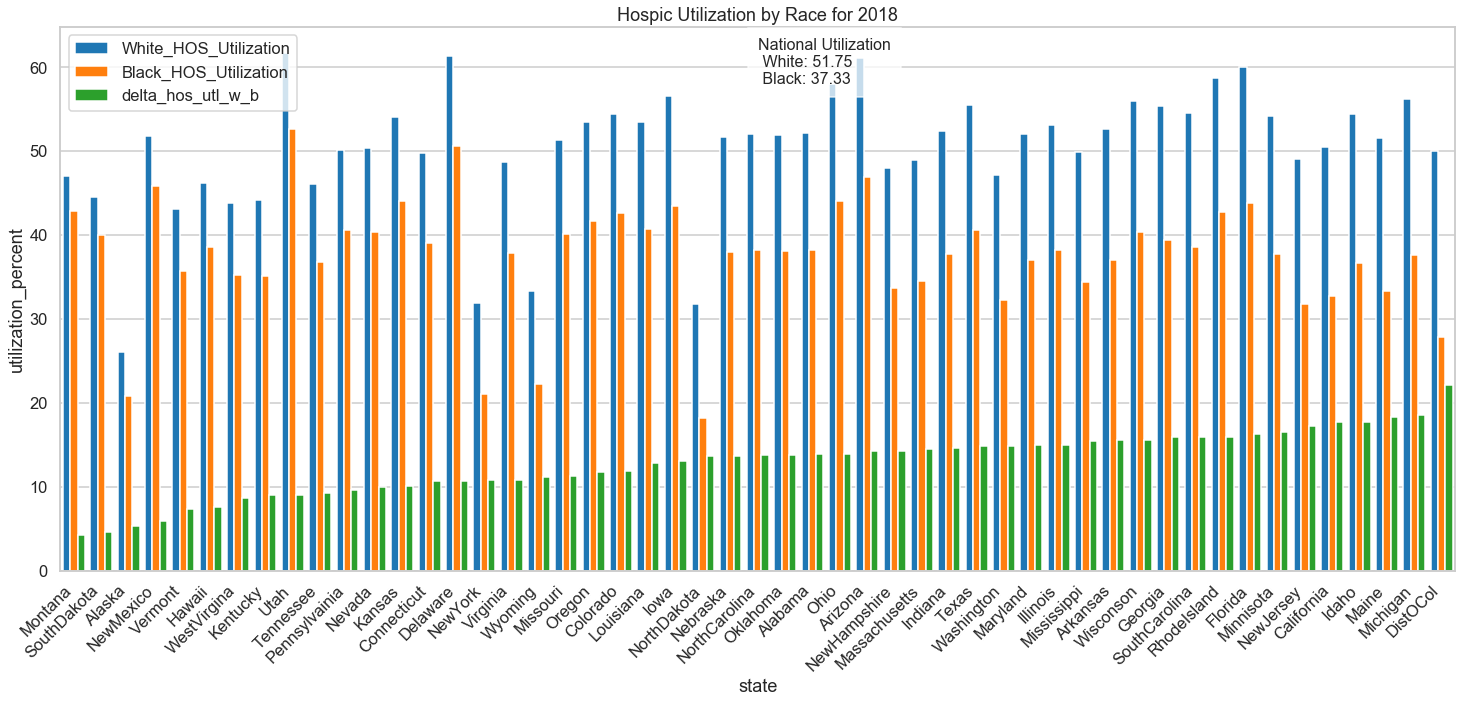

In [102]:
# Calculate the nation utilization numbers
white_nat_utilisation = summary_data.White_HOS_deceased.sum() / summary_data.White_deceased.sum()
black_nat_utilisation = summary_data.Black_HOS_deceased.sum() / summary_data.Black_deceased.sum()

#plot the Figure
plt.figure(figsize=(25,10))
sns.set_context('talk')
sns.set_style('whitegrid')
# create plot
sns.barplot(x = 'state', y ='utilization_percent' ,
            hue = 'race',
            data = temp,
            palette = 'tab10',
            #order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            ci = None,   
            )
plt.text(25,58, f'National Utilization\n White: {round(white_nat_utilisation*100,2)}\n Black: {round(black_nat_utilisation*100,2)} ',
         style='normal',bbox={'facecolor':'white', 'alpha':0.75, 'pad':10},fontsize=16)
plt.legend(loc='best')
#plt.tight_layout()
plt.title('Hospic Utilization by Race for 2018')
plt.xticks(rotation = 45, ha='right')
plt.savefig(f'{figPath}HospicUtilizationByState2018.png',bbox_inches = 'tight')

**Observation**  
the calculation that depicted is the number of people in the state by racial group that died divided by the number of perople who died in hospic. From observing the plot in every state there is a descrepancy between the races use of hospice care.   

In [87]:
white_nat_utilisation = summary_data.White_HOS_deceased.sum() / summary_data.White_deceased.sum()
black_nat_utilisation = summary_data.Black_HOS_deceased.sum() / summary_data.Black_deceased.sum()

print(f'National Utilization\n White: {round(white_nat_utilisation*100,2)}\n Black: {round(black_nat_utilisation*100,2)} ')


National Utilization
 White: 51.75
 Black: 37.33 


### where are people dieing

create a table of where people are dieing

In [29]:

for file in os.listdir(f'e:/PatrickBernard/'):
    if file.endswith('.pkl')== False:
        continue
    else:
        with open(f'e:/PatrickBernard/{file}', 'rb') as f:
            regional_data = pickle.load(f)
        print(file)
    s = regional_data.iloc[0,1]
    a_data = {'state':states[s], 'Tot_record':len(regional_data)}

    race_count = regional_data.groupby('D_Race')['D_Race'].count()

    sum_Race = {'Race_unk_tot' : race_count[0], 'Race_white_tot': race_count[1],'Race_black_tot':race_count[2],'race_other_tot':race_count[3],
                'Race_asian_tot': race_count[4], 'Race_Hispanic_tot': race_count[5], 'Race_NA_Native_tot': race_count[6]}

    a_data.update(sum_Race)

    for i in range (0, 7):
        b_data = {f'{Race[i]}_alive': len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_DIED == 0)].index),
        f'{Race[i]}_deceased' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_DIED == 1)].index),
        f'{Race[i]}_HOS_alive' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_HOS_Died == 0)].index),
        f'{Race[i]}_HOS_deceased' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_HOS_Died == 1)].index),
        f'{Race[i]}_SNF_alive' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_SNF_Died == 0)].index),
        f'{Race[i]}_SNF_deceased' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_SNF_Died == 1)].index),        
        f'{Race[i]}_HHA_alive' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_HHA_DIED == 0)].index),
        f'{Race[i]}_HHA_deceased' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_HHA_DIED == 1)].index),
        f'{Race[i]}_INPT_alive' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_INPT_Died == 0)].index),
        f'{Race[i]}_INPT_deceased' : len(regional_data[(regional_data.D_Race == i)  & (regional_data.D_INPT_Died == 1)].index)}


    #     util = {f'{Race[i]}_HOS_Utilization' : z_data[f'{Race[i]}_HOS_deceased']/z_data[f'{Race[i]}_deceased']}
    #     b_data.update(util)
        a_data.update(b_data)

    try:
        generalize_data = pd.read_csv('e:/PatrickBernard/figures/generalized_data.csv')

    except (OSError, IOError) as e:
        generalize_data = pd.DataFrame()

    generalize_data = generalize_data.append(a_data, ignore_index=True)
    generalize_data.to_csv(f'e:/PatrickBernard/figures/generalized_data.csv',index=False)

AlabamaMBSF2018.pkl
AlaskaMBSF2018.pkl
ArizonaMBSF2018.pkl
ArkansasMBSF2018.pkl
CaliforniaMBSF2018.pkl
ColoradoMBSF2018.pkl
ConnecticutMBSF2018.pkl
DelawareMBSF2018.pkl
DistOColMBSF2018.pkl
FloridaMBSF2018.pkl
GeorgiaMBSF2018.pkl
HawaiiMBSF2018.pkl
IdahoMBSF2018.pkl
IllinoisMBSF2018.pkl
IndianaMBSF2018.pkl
IowaMBSF2018.pkl
KansasMBSF2018.pkl
KentuckyMBSF2018.pkl
LouisianaMBSF2018.pkl
MaineMBSF2018.pkl
MarylandMBSF2018.pkl
MassachusettsMBSF2018.pkl
MichiganMBSF2018.pkl
MinnisotaMBSF2018.pkl
MississippiMBSF2018.pkl
MissouriMBSF2018.pkl
MontanaMBSF2018.pkl
NebraskaMBSF2018.pkl
NevadaMBSF2018.pkl
NewHampshireMBSF2018.pkl
NewJerseyMBSF2018.pkl
NewMexicoMBSF2018.pkl
NewYorkMBSF2018.pkl
NorthCarolinaMBSF2018.pkl
NorthDakotaMBSF2018.pkl
OhioMBSF2018.pkl
OklahomaMBSF2018.pkl
OregonMBSF2018.pkl
PennsylvainiaMBSF2018.pkl
RhodeIslandMBSF2018.pkl
SouthCarolinaMBSF2018.pkl
SouthDakotaMBSF2018.pkl
TennesseeMBSF2018.pkl
TexasMBSF2018.pkl
UtahMBSF2018.pkl
VermontMBSF2018.pkl
VirginiaMBSF2018.pkl
Washin

In [30]:
a_data

{'state': 'Wyoming',
 'Tot_record': 111710,
 'Race_unk_tot': 2297,
 'Race_white_tot': 105072,
 'Race_black_tot': 669,
 'race_other_tot': 850,
 'Race_asian_tot': 286,
 'Race_Hispanic_tot': 1031,
 'Race_NA_Native_tot': 1505,
 'Unknown_alive': 2271,
 'Unknown_deceased': 26,
 'Unknown_HOS_alive': 7,
 'Unknown_HOS_deceased': 10,
 'Unknown_SNF_alive': 18,
 'Unknown_SNF_deceased': 2,
 'Unknown_HHA_alive': 22,
 'Unknown_HHA_deceased': 2,
 'Unknown_INPT_alive': 171,
 'Unknown_INPT_deceased': 2,
 'White_alive': 101149,
 'White_deceased': 3923,
 'White_HOS_alive': 278,
 'White_HOS_deceased': 1308,
 'White_SNF_alive': 2798,
 'White_SNF_deceased': 204,
 'White_HHA_alive': 4038,
 'White_HHA_deceased': 90,
 'White_INPT_alive': 13810,
 'White_INPT_deceased': 697,
 'Black_alive': 651,
 'Black_deceased': 18,
 'Black_HOS_alive': 1,
 'Black_HOS_deceased': 4,
 'Black_SNF_alive': 16,
 'Black_SNF_deceased': 0,
 'Black_HHA_alive': 25,
 'Black_HHA_deceased': 0,
 'Black_INPT_alive': 98,
 'Black_INPT_deceased': 

In [49]:
generalize_data.rename(columns ={'Race_Hispanic_tot':'Hispanic_pop_tot' , 'Race_NA_Native_tot':'NA_Native_pop_tot',
                        'Race_asian_tot':'asian_pop_tot', 'Race_black_tot':'black_pop_tot', 'Race_unk_tot':'unk_pop_tot',
                        'Race_white_tot':'white_pop_tot','race_other_tot':'other_pop_tot'}, inplace = True)

generalize_data.columns

Index(['Asian_HHA_alive', 'Asian_HHA_deceased', 'Asian_HOS_alive',
       'Asian_HOS_deceased', 'Asian_INPT_alive', 'Asian_INPT_deceased',
       'Asian_SNF_alive', 'Asian_SNF_deceased', 'Asian_alive',
       'Asian_deceased', 'Black_HHA_alive', 'Black_HHA_deceased',
       'Black_HOS_alive', 'Black_HOS_deceased', 'Black_INPT_alive',
       'Black_INPT_deceased', 'Black_SNF_alive', 'Black_SNF_deceased',
       'Black_alive', 'Black_deceased', 'Hispanic_HHA_alive',
       'Hispanic_HHA_deceased', 'Hispanic_HOS_alive', 'Hispanic_HOS_deceased',
       'Hispanic_INPT_alive', 'Hispanic_INPT_deceased', 'Hispanic_SNF_alive',
       'Hispanic_SNF_deceased', 'Hispanic_alive', 'Hispanic_deceased',
       'North_American_Native_HHA_alive', 'North_American_Native_HHA_deceased',
       'North_American_Native_HOS_alive', 'North_American_Native_HOS_deceased',
       'North_American_Native_INPT_alive',
       'North_American_Native_INPT_deceased',
       'North_American_Native_SNF_alive', 'North_Ameri

In [53]:
generalize_data.to_csv(f'e:/PatrickBernard/figures/generalized_data.csv',index=False)

In [54]:
generalize_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Asian_HHA_alive,51.0,1266.117647,4543.630613,6.0,88.0,218.0,1027.5,32269.0
Asian_HHA_deceased,51.0,12.000000,43.068318,0.0,1.0,2.0,8.0,307.0
Asian_HOS_alive,51.0,140.019608,523.886419,0.0,8.0,27.0,92.0,3729.0
Asian_HOS_deceased,51.0,273.137255,788.347563,2.0,22.5,65.0,225.0,5469.0
Asian_INPT_alive,51.0,1682.000000,4778.402980,24.0,187.0,422.0,1407.0,33626.0
...,...,...,...,...,...,...,...,...
White_SNF_alive,51.0,27184.764706,25741.128439,659.0,8011.5,19605.0,35130.0,105083.0
White_SNF_deceased,51.0,1109.176471,1103.186398,18.0,298.0,648.0,1559.0,4996.0
White_alive,51.0,921019.764706,896597.495684,27229.0,315361.0,657617.0,1122747.5,4190367.0
White_deceased,51.0,37176.000000,35676.385199,861.0,12025.0,27259.0,46506.0,158352.0


In [ ]:
OLD_col_var = ['Asian_HHA_alive', 'Asian_HHA_deceased', 'Asian_HOS_alive',
       'Asian_HOS_deceased', 'Asian_INPT_alive', 'Asian_INPT_deceased',
       'Asian_SNF_alive', 'Asian_SNF_deceased', 'Asian_alive',
       'Asian_deceased', 'Black_HHA_alive', 'Black_HHA_deceased',
       'Black_HOS_alive', 'Black_HOS_deceased', 'Black_INPT_alive',
       'Black_INPT_deceased', 'Black_SNF_alive', 'Black_SNF_deceased',
       'Black_alive', 'Black_deceased', 'Hispanic_HHA_alive',
       'Hispanic_HHA_deceased', 'Hispanic_HOS_alive', 'Hispanic_HOS_deceased',
       'Hispanic_INPT_alive', 'Hispanic_INPT_deceased', 'Hispanic_SNF_alive',
       'Hispanic_SNF_deceased', 'Hispanic_alive', 'Hispanic_deceased',
       'North_American_Native_HHA_alive', 'North_American_Native_HHA_deceased',
       'North_American_Native_HOS_alive', 'North_American_Native_HOS_deceased',
       'North_American_Native_INPT_alive',
       'North_American_Native_INPT_deceased',
       'North_American_Native_SNF_alive', 'North_American_Native_SNF_deceased',
       'North_American_Native_alive', 'North_American_Native_deceased',
       'Other_HHA_alive', 'Other_HHA_deceased', 'Other_HOS_alive',
       'Other_HOS_deceased', 'Other_INPT_alive', 'Other_INPT_deceased',
       'Other_SNF_alive', 'Other_SNF_deceased', 'Other_alive',
       'Other_deceased', 'Hispanic_pop_tot', 'NA_Native_pop_tot',
       'asian_pop_tot', 'black_pop_tot', 'unk_pop_tot', 'white_pop_tot',
       'Tot_record', 'Unknown_HHA_alive', 'Unknown_HHA_deceased',
       'Unknown_HOS_alive', 'Unknown_HOS_deceased', 'Unknown_INPT_alive',
       'Unknown_INPT_deceased', 'Unknown_SNF_alive', 'Unknown_SNF_deceased',
       'Unknown_alive', 'Unknown_deceased', 'White_HHA_alive',
       'White_HHA_deceased', 'White_HOS_alive', 'White_HOS_deceased',
       'White_INPT_alive', 'White_INPT_deceased', 'White_SNF_alive',
       'White_SNF_deceased', 'White_alive', 'White_deceased', 'other_pop_tot']

In [102]:
col_var_b = ['Black_HHA_alive', 'Black_HHA_deceased',
       'Black_HOS_alive', 'Black_HOS_deceased', 'Black_INPT_alive',
       'Black_INPT_deceased', 'Black_SNF_alive', 'Black_SNF_deceased',
       'Black_deceased']

col_var_w = ['White_HHA_alive','White_HHA_deceased', 'White_HOS_alive', 'White_HOS_deceased',
       'White_INPT_alive', 'White_INPT_deceased', 'White_SNF_alive',
       'White_SNF_deceased', 'White_deceased']

for i in col_var_b:
    st= f'{i}_pcnt'
    generalize_data[st] = generalize_data[i]/generalize_data.Black_deceased
for i in col_var_w:
    st= f'{i}_pcnt'
    generalize_data[st] = generalize_data[i]/generalize_data.White_deceased
    
generalize_data.sample(5)

,Asian_HHA_alive,Asian_HHA_deceased,Asian_HOS_alive,Asian_HOS_deceased,Asian_INPT_alive,Asian_INPT_deceased,Asian_SNF_alive,Asian_SNF_deceased,Asian_alive,Asian_deceased,...,Black_deceased_pcnt,White_HHA_alive_pcnt,White_HHA_deceased_pcnt,White_HOS_alive_pcnt,White_HOS_deceased_pcnt,White_INPT_alive_pcnt,White_INPT_deceased_pcnt,White_SNF_alive_pcnt,White_SNF_deceased_pcnt,White_deceased_pcnt
40,442.0,1.0,59.0,175.0,831.0,35.0,164.0,6.0,13756.0,337.0,...,1.0,1.177153,0.011106,0.198634,0.580464,2.299473,0.097327,0.707699,0.025803,1.0
18,3566.0,27.0,114.0,366.0,3110.0,172.0,835.0,21.0,49436.0,1195.0,...,1.0,1.603514,0.016418,0.145672,0.531945,3.120878,0.147272,0.985502,0.036717,1.0
36,79.0,1.0,7.0,29.0,137.0,6.0,25.0,0.0,2507.0,58.0,...,1.0,1.203922,0.018347,0.235230,0.517842,2.251641,0.121781,0.494193,0.020199,1.0
2,447.0,6.0,22.0,65.0,609.0,44.0,208.0,6.0,9578.0,229.0,...,1.0,1.808028,0.016697,0.129077,0.497880,2.502768,0.142832,1.036249,0.036681,1.0
15,675.0,5.0,85.0,208.0,1052.0,64.0,169.0,4.0,26647.0,560.0,...,1.0,1.298578,0.021903,0.235200,0.553498,2.607216,0.127134,0.557362,0.020706,1.0


In [110]:
col_var_bb = ['Black_HHA_alive_pcnt', 'Black_HHA_deceased_pcnt',
       'Black_HOS_alive_pcnt', 'Black_HOS_deceased_pcnt', 'Black_INPT_alive_pcnt',
       'Black_INPT_deceased_pcnt', 'Black_SNF_alive_pcnt', 'Black_SNF_deceased_pcnt']

col_var_ww = ['White_HHA_alive_pcnt','White_HHA_deceased_pcnt', 'White_HOS_alive_pcnt', 'White_HOS_deceased_pcnt',
       'White_INPT_alive_pcnt', 'White_INPT_deceased_pcnt', 'White_SNF_alive_pcnt',
       'White_SNF_deceased_pcnt']

temp2 = pd.melt(generalize_data, id_vars='state', value_vars=col_var_bb,
               var_name='discharge_status', value_name='prcnt_pop', col_level=None)


temp3 = pd.melt(generalize_data, id_vars='state', value_vars=col_var_ww,
               var_name='discharge_status', value_name='prcnt_pop', col_level=None)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

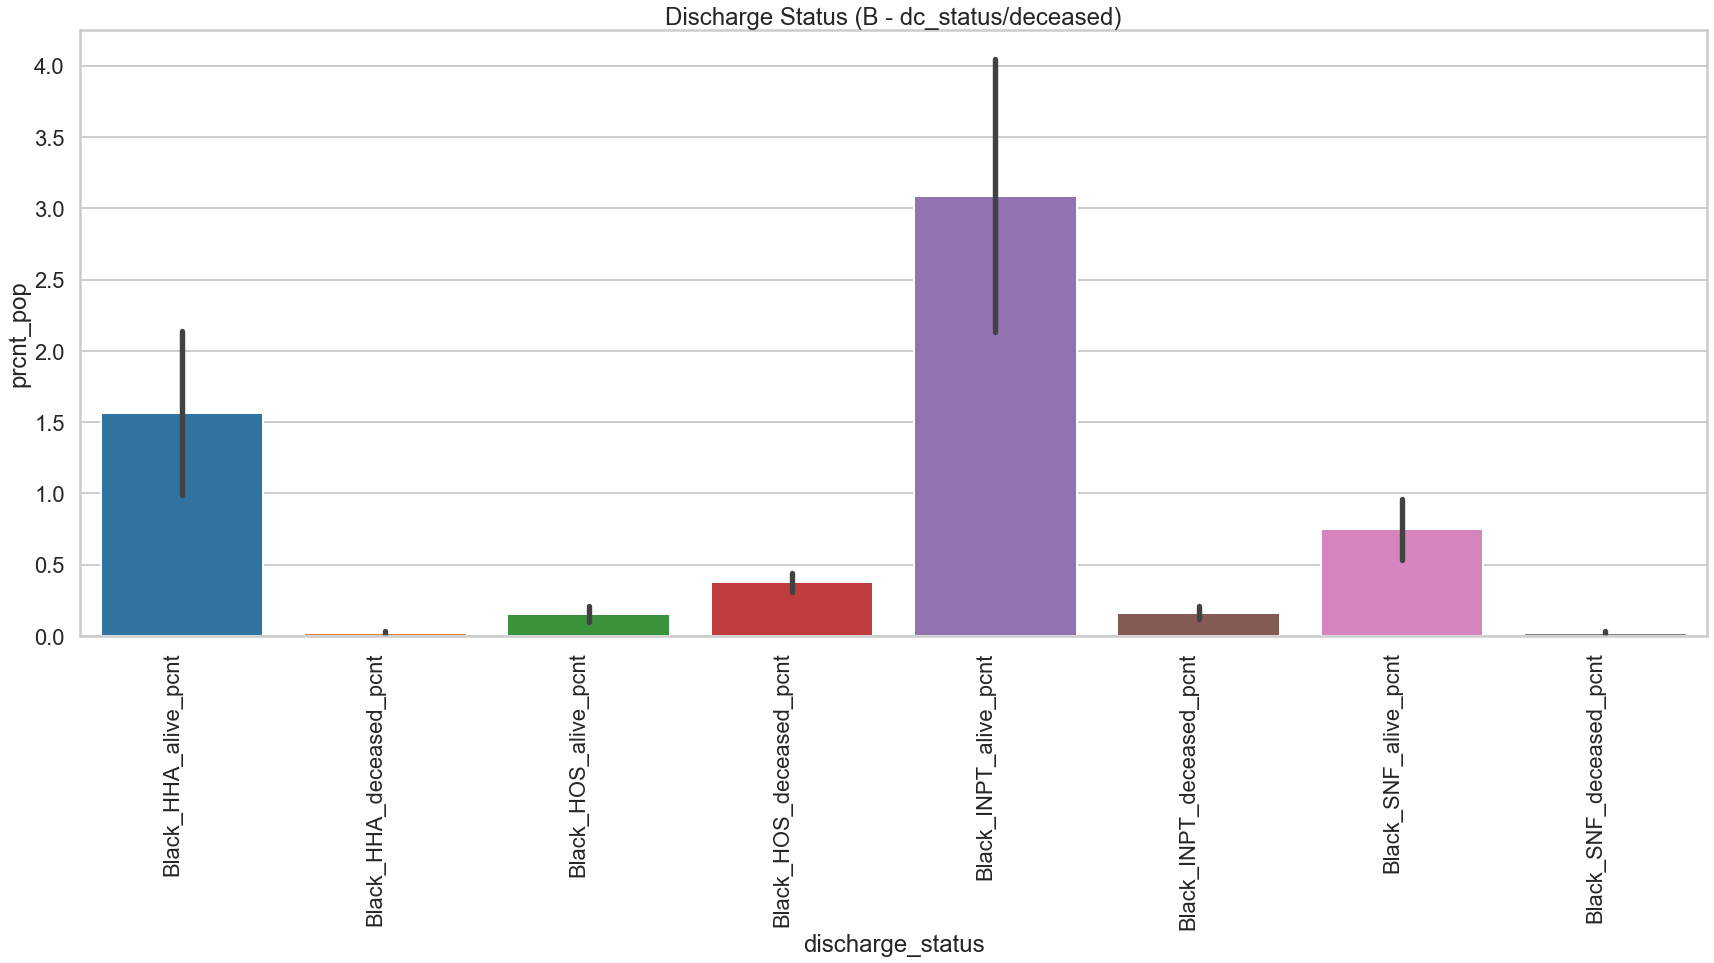

In [111]:
plt.figure(figsize=(25,10))
sns.set_context('poster')
sns.set_style("whitegrid")
sns.barplot(data= temp2, x= 'discharge_status', y= 'prcnt_pop',ci = 'sd')
#plt.yscale="symlog"
plt.tight_layout()
plt.title('Discharge Status (B - dc_status/deceased)')
plt.xticks(rotation = 90, ha='right')
#plt.savefig(f'e:/PatrickBernard/figures/RF_Class/xxx.png',bbox_inches = 'tight')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

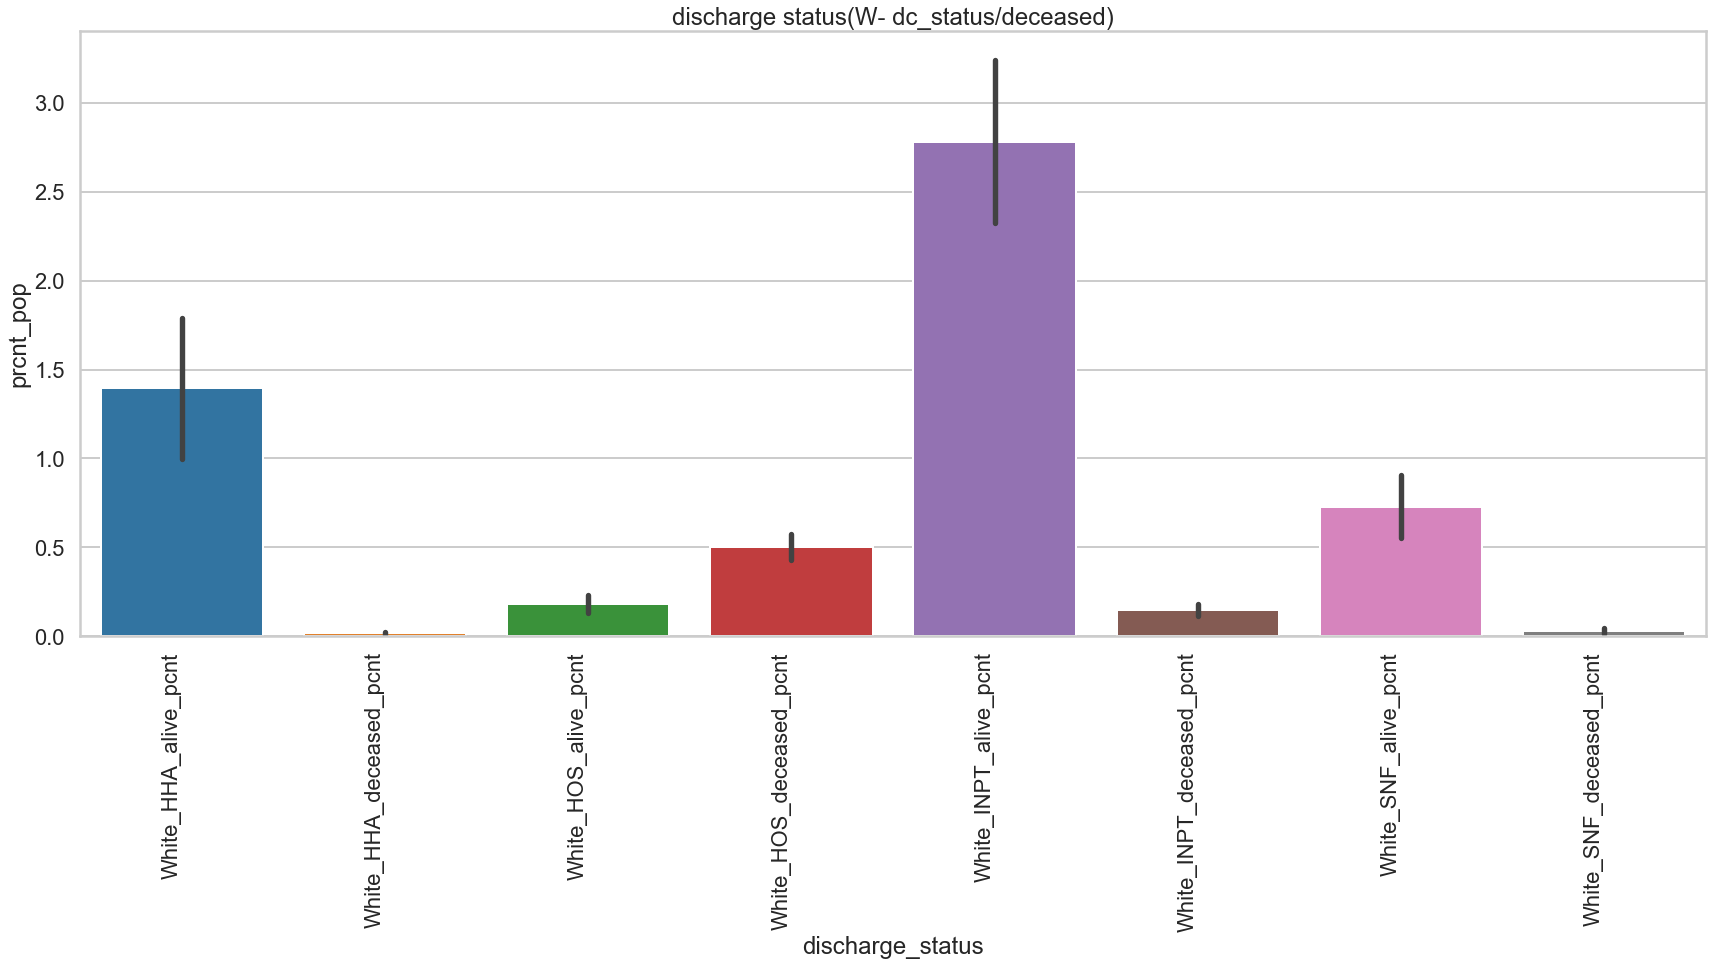

In [112]:
plt.figure(figsize=(25,10))
sns.set_context('poster')
sns.set_style("whitegrid")
sns.barplot(data= temp3, x= 'discharge_status', y= 'prcnt_pop',ci = 'sd')
#plt.yscale="symlog"
plt.tight_layout()
plt.title('discharge status(W- dc_status/deceased)')
plt.xticks(rotation = 90, ha='right')
#plt.savefig(f'e:/PatrickBernard/figures/RF_Class/xxx.png',bbox_inches = 'tight')

In [59]:
generalize_data.columns

Index(['Asian_HHA_alive', 'Asian_HHA_deceased', 'Asian_HOS_alive',
       'Asian_HOS_deceased', 'Asian_INPT_alive', 'Asian_INPT_deceased',
       'Asian_SNF_alive', 'Asian_SNF_deceased', 'Asian_alive',
       'Asian_deceased', 'Black_HHA_alive', 'Black_HHA_deceased',
       'Black_HOS_alive', 'Black_HOS_deceased', 'Black_INPT_alive',
       'Black_INPT_deceased', 'Black_SNF_alive', 'Black_SNF_deceased',
       'Black_alive', 'Black_deceased', 'Hispanic_HHA_alive',
       'Hispanic_HHA_deceased', 'Hispanic_HOS_alive', 'Hispanic_HOS_deceased',
       'Hispanic_INPT_alive', 'Hispanic_INPT_deceased', 'Hispanic_SNF_alive',
       'Hispanic_SNF_deceased', 'Hispanic_alive', 'Hispanic_deceased',
       'North_American_Native_HHA_alive', 'North_American_Native_HHA_deceased',
       'North_American_Native_HOS_alive', 'North_American_Native_HOS_deceased',
       'North_American_Native_INPT_alive',
       'North_American_Native_INPT_deceased',
       'North_American_Native_SNF_alive', 'North_Ameri